In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
df1 = pd.read_csv('House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Cleaning

In [5]:
df2 = df1.drop(['area_type', 'availability', 'society'],  axis = "columns")
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
balcony_median = df2['balcony'].median()
bath_median = df2['bath'].median()
print(balcony_median)
print(bath_median)

2.0
2.0


In [8]:
df3 = df2.fillna({'bath': bath_median, 'balcony': balcony_median})
df3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df3.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [10]:
df4 = df3.dropna(subset = ['size', 'location'])
df4.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df4.shape

(13303, 6)

In [13]:
df4['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df4['bhk'] = df4['size'].apply(lambda s: int(s.split(" ")[0]))
df4.head()

C:\Users\Akshay Sharma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [15]:
df5 = df4.drop(['size'], axis = 1)
df5.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [16]:
df5['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df5[df5['bhk'] > 20] 
# Munnekollal	2400	40.0	0.0	660.0	43     => 43 bedroom is not possible in 2400 sqrt area

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [18]:
type(df5['total_sqft'][1718])

str

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df5[~df5['total_sqft'].apply(is_float)].head(15)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [21]:
# Convert range value of total_sqft into float

def range_to_float(s):
    parts = s.split('-')
    if len(parts) == 2:
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(s)
    except:
        return None

In [22]:
df6 = df5.copy()
df6['total_sqft'] = df5['total_sqft'].apply(range_to_float)
df6.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


# Features Engineering

In [23]:
df6['price_per_sqft_rupees'] = (df6.price * 100000 / df6.total_sqft)
df6.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft_rupees
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
df6.rename({'price' : 'price_lakh'}, axis = 1, inplace = True)
df6.head()

,location,total_sqft,bath,balcony,price_lakh,bhk,price_per_sqft_rupees
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [25]:
df6.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1304, dtype: int64

In [26]:
df6.location = df6.location.apply(lambda x: x.strip())
location_stat = df6.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stat

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [27]:
print(len(location_stat))
print(len(location_stat[location_stat <= 10]))

1293
1052


In [28]:
location_stat_less_than_10 = location_stat[location_stat <= 10]
df6.location = df6.location.apply(lambda x: 'other' if x in location_stat_less_than_10 else x)

In [29]:
len(df6.location.unique())

242

In [30]:
df6.head(10)

,location,total_sqft,bath,balcony,price_lakh,bhk,price_per_sqft_rupees
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,1020.0,6.0,2.0,370.00,6,36274.509804


# Outlier Removal

In [31]:
df6[(df6.total_sqft / df6.bhk) < 300].head()

,location,total_sqft,bath,balcony,price_lakh,bhk,price_per_sqft_rupees
9,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000


In [32]:
df7 = df6[~((df6.total_sqft / df6.bhk) < 300)]
df7.head()

,location,total_sqft,bath,balcony,price_lakh,bhk,price_per_sqft_rupees
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [33]:
df7.price_per_sqft_rupees.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft_rupees, dtype: float64

In [34]:
mean = np.mean(df7.price_per_sqft_rupees)
std = np.std(df7.price_per_sqft_rupees)
print(mean, std)

6307.441644249871 4160.765341843499


In [35]:
df8 = df7[(df7.price_per_sqft_rupees > (mean - std)) & (df7.price_per_sqft_rupees <= (mean + std))]
df8.head()

,location,total_sqft,bath,balcony,price_lakh,bhk,price_per_sqft_rupees
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [36]:
df8.price_per_sqft_rupees.describe()

count    11344.000000
mean      5371.370744
std       1664.581345
min       2149.277061
25%       4125.000000
50%       5094.576040
75%       6363.636364
max      10466.507177
Name: price_per_sqft_rupees, dtype: float64

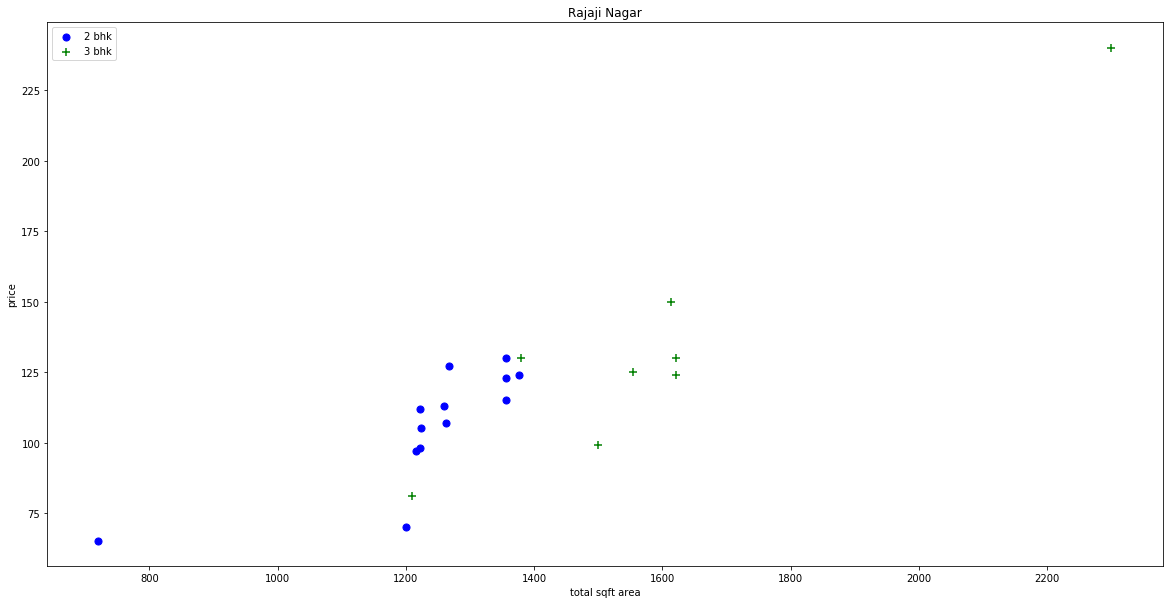

In [37]:
def plotter_scatter_chart(df, location):
    bhk2 = df8[(df8.location == location) & (df8.bhk == 2)]
    bhk3 = df8[(df8.location == location) & (df8.bhk == 3)]
    plt.scatter(bhk2.total_sqft, bhk2.price_lakh, color = 'blue', label = '2 bhk', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price_lakh, color = 'green', marker = '+', label = '3 bhk', s = 50)
    plt.xlabel('total sqft area')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()
plotter_scatter_chart(df8, 'Rajaji Nagar')

Text(0, 0.5, 'Frequency')

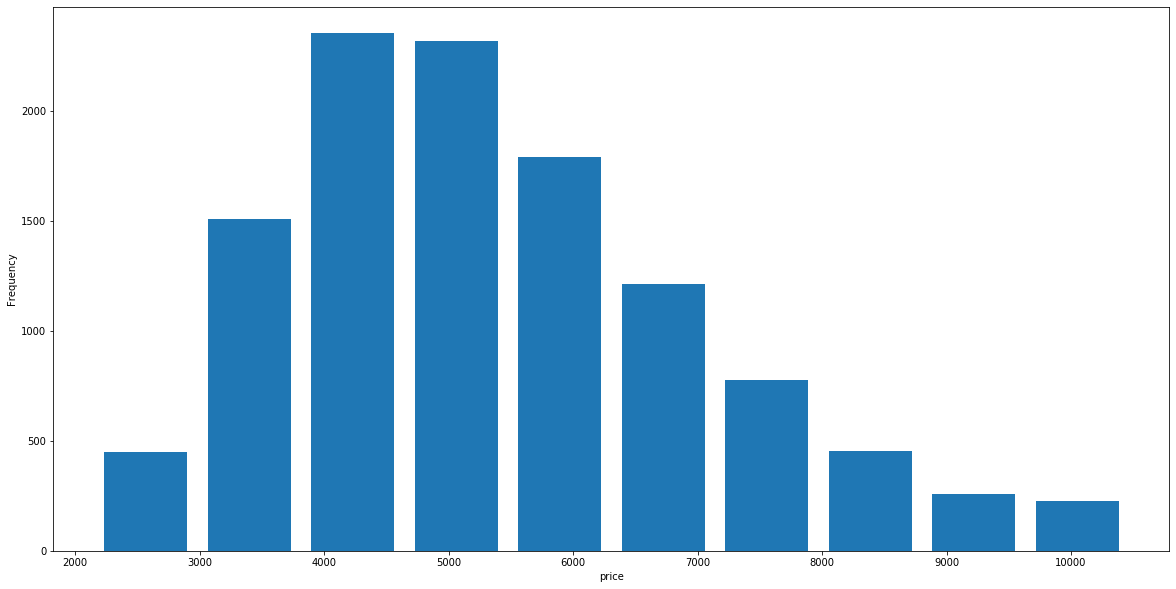

In [38]:
plt.hist(df8.price_per_sqft_rupees, rwidth = 0.8)
plt.xlabel('price')
plt.ylabel('Frequency')

In [39]:
# If the number of bath is greater than number of bedroom then remove that data
df9 = df8[df8.bath < df8.bhk + 2]
df9.head()

,location,total_sqft,bath,balcony,price_lakh,bhk,price_per_sqft_rupees
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [40]:
df9.shape

(11248, 7)

(array([7.382e+03, 2.820e+03, 9.560e+02, 1.160e+02, 5.300e+01, 1.000e+01,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

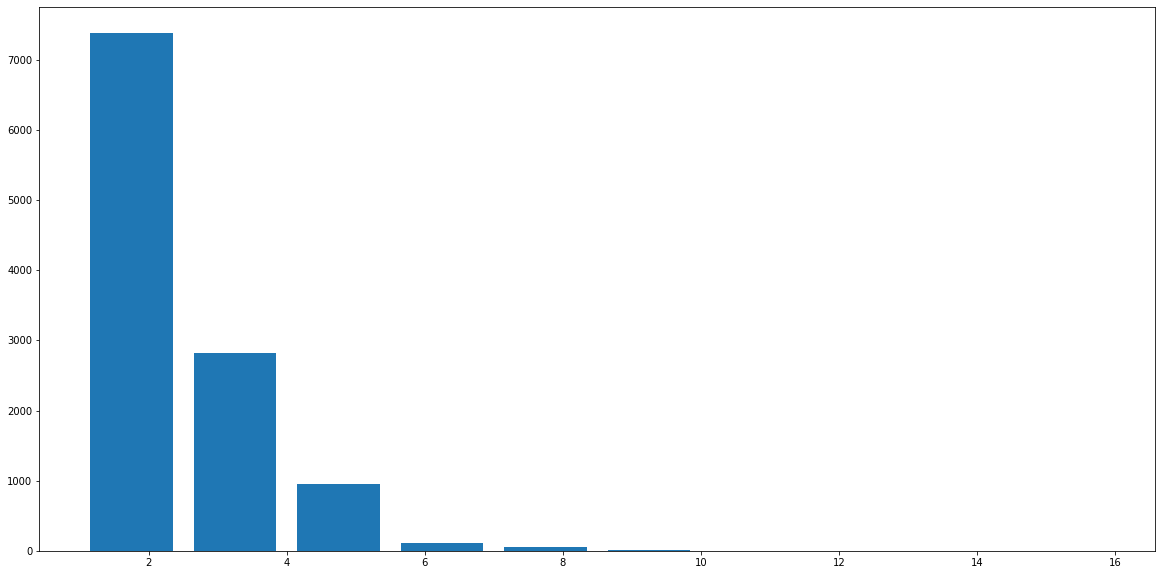

In [41]:
plt.hist(df8.bath, rwidth = 0.8)

In [42]:
df9

,location,total_sqft,bath,balcony,price_lakh,bhk,price_per_sqft_rupees
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [43]:
df9.balcony.unique()

array([1., 3., 2., 0.])

In [44]:
df10 = df9.drop(['price_per_sqft_rupees'], axis = 1)
df10.head()

,location,total_sqft,bath,balcony,price_lakh,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [45]:
# Convert location from string data types into  a number forms
location_dummies = pd.get_dummies(df10.location)
location_dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df11 = pd.concat([df10, location_dummies], axis = 1)
df11.head()

,location,total_sqft,bath,balcony,price_lakh,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,51.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df12 = df11.drop(['location'], axis= 1)
df12.head()

,total_sqft,bath,balcony,price_lakh,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,1.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [48]:
features_X = df12.drop(['price_lakh'], axis = 'columns')
features_X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
label_Y = df12.price_lakh
label_Y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price_lakh, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features_X, label_Y, test_size = 0.2, random_state = 10)

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_x, train_y)
reg.score(test_x, test_y)

0.7961927142589027

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), features_X, label_Y, cv = cv)

array([ 8.14438354e-01, -9.26546405e+15, -5.64869471e+14,  8.58972819e-01,
        8.28744712e-01])

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [54]:
def find_best_model_using_gridsearchcv(features_X, label_Y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' :{'normalize' : [True, False]}
        },
        
        'lasso' : {
            'model' : Lasso(),
            'params' : {'alpha' : [1,2], 'selection' : ['random', 'cyclic']}
        },
        
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {'criterion' : ['mse', 'friedman_mse'], 'splitter' : ['best', 'random']}
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(features_X, label_Y)
        scores.append({'model':algo_name, 'best_score':gs.best_score_, 'best_params':gs.best_params_})

    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(features_X, label_Y)

,model,best_score,best_params
0,linear_regression,-1.966067e+15,{'normalize': False}
1,lasso,8.025246e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,7.600736e-01,"{'criterion': 'mse', 'splitter': 'random'}"


In [57]:
def predict_price(location, sqft, bath, balcony, bhk):
    loc_index = np.where(features_X.columns == location)[0]
    
    x = np.zeros(len(features_X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return reg.predict([x])[0]

In [62]:
predict_price('Whitefield',1170, 2, 1, 2)

66.09335871783381